# Transport Vehicles Sales (EDA in Python)

##### This project focuses on exploratory data analysis (EDA) of sales records to extract actionable insights and understand key sales trends. Using Python, I analyzed a comprehensive dataset that includes various attributes of sales transactions, customer details, and product information. 

##### The following tasks were performed:

1. Data Summary and Initial Inspection
2. Handling Missing Data
3. Data Type Conversion
4. Univariate 
5. Bivariate Analysis
6. Time Series Analysis
7. Categorical Data Analysis
8. Pivot Tables and Grouping
9. Correlation and Heatmap
10. Customer Segmentation (K-means Clustering)

### 1. Data Summary and Initial Inspection

##### First we review the dataset to understand its structure by displaying basic information, summary statistics, checking for missing values and duplicates, and overall row counts. This initial inspection will help identify data quality issues and provide an overview of the dataset.

In [42]:
# Let's load necessary libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

In [43]:
# Display basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [44]:
# Display summary statistics for numerical columns.abs

df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [45]:
# Check for missing values

df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [46]:
# Check for duplicates.

df[df.duplicated(keep=False)].sort_values(by='ORDERDATE')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [47]:
# let's determine numbers of rows.

df.shape

(2823, 25)

Upon analyzing the dataset, it was noted that the buyers are not retail consumers, but rather resellers.

Task 1, done.

### 2. Handling Missing Data

##### After identifying missing values, it’s essential to handle them appropriately to ensure data quality. Depending on the nature of the data and the extent of missingness, different approaches can be used.

##### Referring to Task 1, let's observe the columns with missing values and its count: 
-Columns with missing data are ADDRESSLINE2, STATE, POSTALCODE, and TERRITORY.

-Around 80% rows are affected from missing values, column 'ADDRESSLINE2' being the highest.

-All columns with missing values are NOMINAL and Categorical in nature. 

##### Therefore, removing these rows will not provide any advantage for our analysis. Instead, we will explore alternative methods to address the missing data.

In [48]:
# Let's check columns with missing values. First we deal with column ADDRESSLINE2.

df[df.isnull().any(axis=1)]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


As observed, the column **ADDRESSLINE2** appears to be associated with ADDRESSLINE1, typically containing a secondary address when applicable, making it optional. Based on a domain-knowledge imputation approach, we will remove the ADDRESSLINE2 column.

In [49]:
# Remove ADDRESSLINE2 column.

df.drop('ADDRESSLINE2', axis=1, inplace=True)

# then check to confirm.

df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [50]:
# Let's check the column STATE in a unique order sorted by COUNTRY . 

df[['COUNTRY', 'STATE']].drop_duplicates().sort_values(by='COUNTRY')

,COUNTRY,STATE
21,Australia,NSW
10,Australia,Victoria
32,Australia,Queensland
20,Austria,NaN
119,Belgium,NaN
35,Canada,BC
52,Canada,Quebec
106,Denmark,NaN
16,Finland,NaN
1,France,NaN


As observed, the column labeled **STATE** does not strictly adhere to the formal definition of a 'State'; instead, it includes regions or major divisions from other countries besides the USA.

I have decided to take the following actions:

-Rename column 'STATE' to 'STATE/REGION'.

-Replace 'NaN' rows in column STATE with 'Not Specified'.

In [51]:
# Rename column STATE to STATE/REGION

df.rename(columns={'STATE':'STATE/REGION'}, inplace=True)

In [52]:
# Replace NaN rows in column STATE/REGION with Not Specified.

df['STATE/REGION'] = df['STATE/REGION'].fillna('Not Specified')

In [53]:
# Let's check again to confirm.

df[['COUNTRY', 'STATE/REGION']].drop_duplicates().sort_values(by='COUNTRY')

,COUNTRY,STATE/REGION
21,Australia,NSW
10,Australia,Victoria
32,Australia,Queensland
20,Austria,Not Specified
119,Belgium,Not Specified
35,Canada,BC
52,Canada,Quebec
106,Denmark,Not Specified
16,Finland,Not Specified
1,France,Not Specified


Now let's deal with missing values in **POSTALCODE**.

In [54]:
# Show NaN rows in column POSTALCODE and its COUNTRY.

df[df['POSTALCODE'].isna()]['COUNTRY'].unique()

array(['USA'], dtype=object)

In [55]:
# The only country with missing POSTALCODE is USA. We can fill it with value in the column CITY instead.

df['POSTALCODE'] = df['POSTALCODE'].fillna(df['CITY'])
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE/REGION,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,Not Specified,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Not Specified,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,San Francisco,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Not Specified,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,Not Specified,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Not Specified,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,Not Specified,31000,France,EMEA,Roulet,Annette,Small


Lastly, let's check for **TERRITORY** and its missing values by COUNTRY.

In [56]:
df[df['TERRITORY'].isna()]['COUNTRY'].unique()

array(['USA', 'Canada'], dtype=object)

In [57]:
# The only country with missing TERRITORY is USA and Canada; which both are within the territory of North America.

# Let's fill the missing TERRITORY with North America.

df['TERRITORY'] = df['TERRITORY'].fillna('North America')

df[['COUNTRY', 'TERRITORY']].query('TERRITORY == "North America"')

,COUNTRY,TERRITORY
0,USA,North America
3,USA,North America
4,USA,North America
5,USA,North America
8,USA,North America
...,...,...
2809,USA,North America
2810,Canada,North America
2812,Canada,North America
2817,USA,North America


In [58]:
# Final check for missing values

df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE/REGION        0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

Task 2, done.

### 3. Data Type Conversion

##### After handling missing data, it’s important to ensure that each column has the correct data type for accurate analysis and efficient processing. Converting data types helps avoid errors and ensures the appropriate operations can be performed on the data.

In [59]:
# let's check the columns, its data type, and value characteristics that each contain. 

df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
CITY                 object
STATE/REGION         object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [60]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE/REGION,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,North America,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,Not Specified,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Not Specified,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,North America,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,San Francisco,USA,North America,Brown,Julie,Medium


We identified several columns that require conversion:

-The ORDERDATE column should be converted to the datetime data type.

-The columns CITY, STATE/REGION, COUNTRY, TERRITORY, STATUS, and DEALSIZE contain categorical values and should be converted to the category data type.

In [61]:
# let's convert the ORDERDATE column to datetime format.

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [62]:
# let's convert columns CITY, STATE/REGION, COUNTRY, TERRITORY, and DEALSIZE to category data type.

df[['CITY', 'STATE/REGION', 'COUNTRY', 'TERRITORY', 'DEALSIZE', 'STATUS']] = df[['CITY', 'STATE/REGION', 'COUNTRY', 'TERRITORY', 'DEALSIZE', 'STATUS']].astype('category')

In [63]:
# Final data type checkabs

df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                    category
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
CITY                      category
STATE/REGION              category
POSTALCODE                  object
COUNTRY                   category
TERRITORY                 category
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                  category
dtype: object

Task 3, done.

### 4. Univariate Analysis

##### Univariate analysis focuses on examining the distribution and properties of a single variable (column) at a time. For this example, we will create a Histogram for the column SALES and Boxplot for the column QUANTITYORDERED.


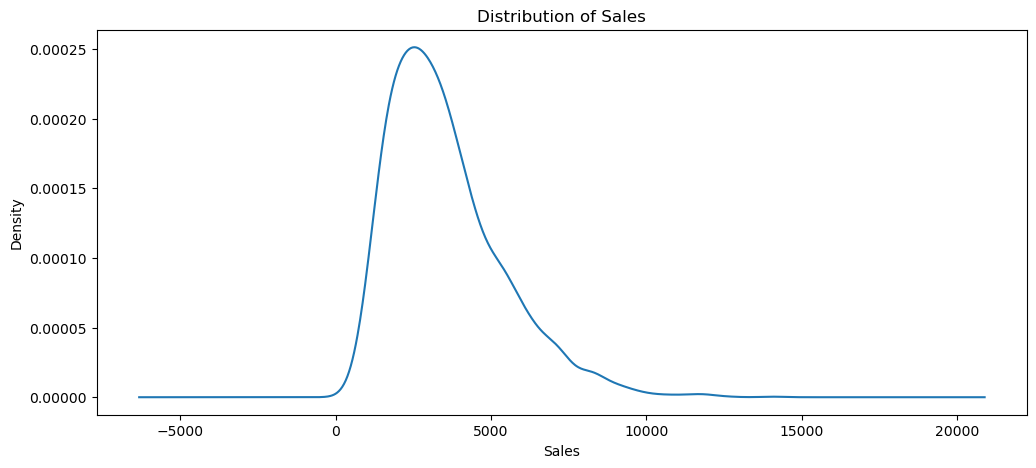

In [64]:
# Histogram for SALES

kde_ax = df['SALES'].plot(kind='kde', figsize=(12, 5), title='Distribution of Sales')

kde_ax.set_xlabel('Sales')
plt.show()

As observed above, SALES distribution is NOT normally distributed.

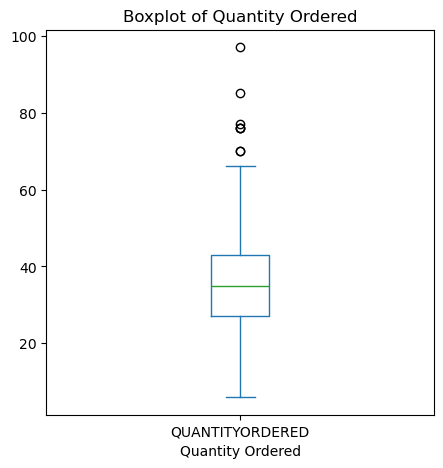

In [65]:
# Boxplot for QUANTITYORDERED

boxplt_ax = df['QUANTITYORDERED'].plot(kind='box', figsize=(5, 5), title='Boxplot of Quantity Ordered')

boxplt_ax.set_xlabel('Quantity Ordered')
plt.show()

In [66]:
# let's identify rows with oultiers.
q1 = df['QUANTITYORDERED'].quantile(0.25)
q3 = df['QUANTITYORDERED'].quantile(0.75)
iqr = q3 - q1

# identify the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# identify outliers in the QUANTITYORDERED column and their index.
outliers = df[(df['QUANTITYORDERED'] < lower_bound) | (df['QUANTITYORDERED'] > upper_bound)]
outliers.index


Index([418, 598, 1666, 1714, 1995, 1996, 2586, 2689], dtype='int64')

Task 4, done.

### 5. Bivariate Analysis

##### Bivariate analysis involves examining the relationship between two variables to understand their interactions, correlations, and potential impacts on each other. Let's use SALES and QUANTITYORDERED for this part.

<Axes: xlabel='QUANTITYORDERED', ylabel='SALES'>

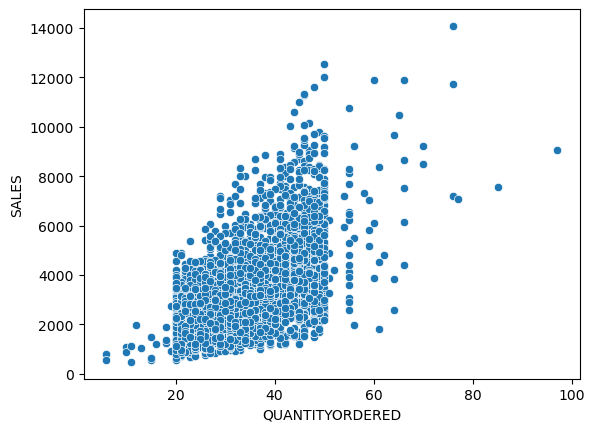

In [67]:
# Let's make a scatter plot of SALES vs. QUANTITYORDERED

sns.scatterplot(df, x='QUANTITYORDERED', y='SALES')

In [68]:
#lets make a correlation matrix column included.

corr_matrix = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].corr()
corr_matrix


,SALES,QUANTITYORDERED,PRICEEACH
SALES,1.000000,0.551426,0.657841
QUANTITYORDERED,0.551426,1.000000,0.005564
PRICEEACH,0.657841,0.005564,1.000000


Task 5, done.

### 6. Time Series Analysis   

##### This is just a simple Time Series analysis to explore sales trends over time and identify patterns or seasonality in the data.

In [69]:
# Extract year and month from the ORDERDATE

df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month

In [70]:
# Group sales by month and year

sales_trends = df.groupby(['Year', 'Month'])['SALES'].sum().reset_index()


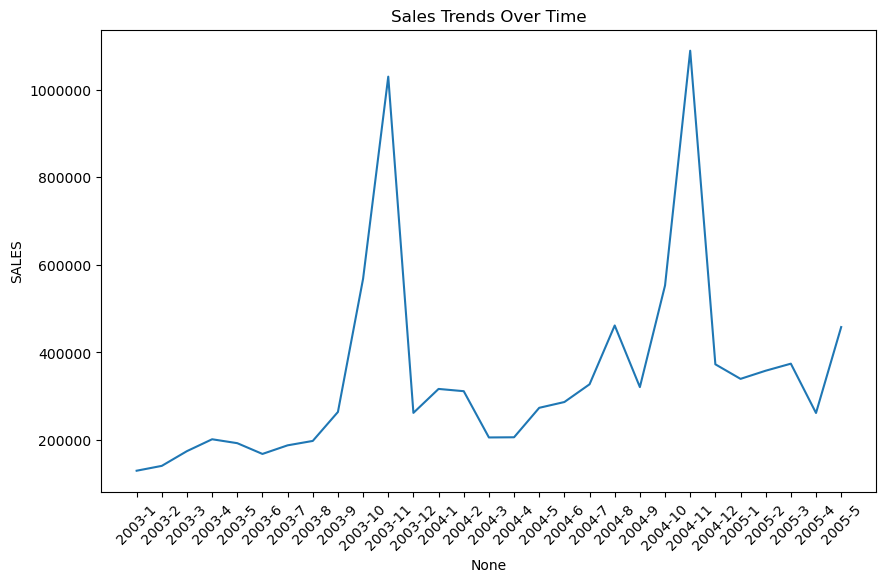

In [71]:
# Line plot of sales over time

plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_trends.index, y='SALES', data=sales_trends)
plt.title('Sales Trends Over Time')
plt.xticks(ticks=sales_trends.index, labels=sales_trends['Year'].astype(str) + '-' + sales_trends['Month'].astype(str), rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

It's apparent that from 2003 to 2005, the highest sales peaks at around October and November; probably due to preparation for the December holiday rush.

Task 6, done.

### 7. Categorical Data Analysis

##### In this section, we will explore and analyze the categorical variables present in the dataset to uncover trends, relationships, and patterns. Categorical data refers to variables that can take on a limited, fixed number of possible values representing distinct groups or categories.

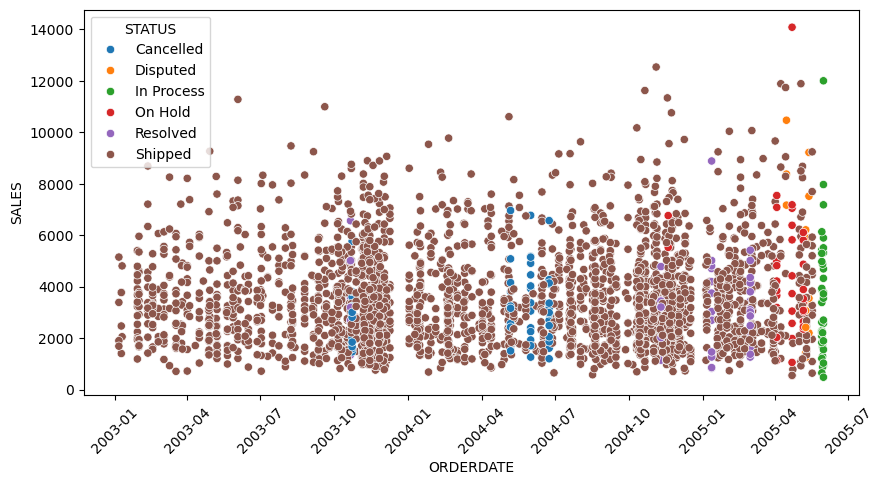

In [72]:
# Scatterplot for STATUS
plt.figure(figsize=(10, 5))
sns.scatterplot(df, x='ORDERDATE', y='SALES', hue='STATUS')
plt.xticks(rotation=45)
plt.show()

A large cluster of cancelled orders occured between May to July of 2004. Reasons for it are yet to be known.

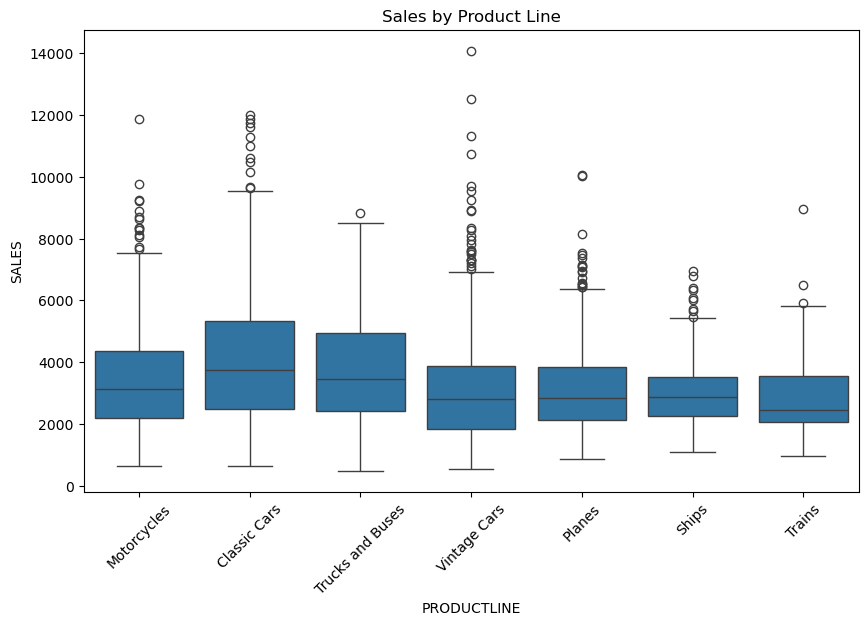

In [73]:
# Boxplot for SALES by PRODUCTLINE

plt.figure(figsize=(10, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

Task 7, done.

### 8. Pivot Tables and Grouping

##### Pivot tables and grouping are powerful tools for summarizing and analyzing data, particularly when dealing with large datasets. They allow us to aggregate data, perform calculations, and visualize relationships between different variables.

In [74]:
# Pivot table for total sales by country

pivot_sales_country = df.pivot_table(values='SALES', index='COUNTRY', aggfunc='sum', observed=False)\
                    .sort_values(by='SALES', ascending=False)
print(pivot_sales_country)

                  SALES
COUNTRY                
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Canada        224078.56
Germany       220472.09
Sweden        210014.21
Austria       202062.53
Japan         188167.81
Switzerland   117713.56
Belgium       108412.62
Philippines    94015.73
Ireland        57756.43


In [75]:
# Group sales by CUSTOMERNAME and aggregate total sales

df.groupby('CUSTOMERNAME')['SALES'].agg(TOTAL_SALES='sum')


#Sort by 'Total Sales'
df.groupby('CUSTOMERNAME')['SALES'].agg(TOTAL_SALES='sum')\
        .sort_values(by='TOTAL_SALES', ascending=False)

,TOTAL_SALES
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90
...,...
Royale Belge,33440.10
Microscale Inc.,33144.93
Auto-Moto Classics Inc.,26479.26


Task 8, done.

### 9. Correlation and Heatmap

##### Just like task 5, but with more numerical variables.

In [76]:
# Calculate correlation between numerical variables

corr_matrix = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MONTH_ID']].corr()
corr_matrix

,QUANTITYORDERED,PRICEEACH,SALES,MONTH_ID
QUANTITYORDERED,1.000000,0.005564,0.551426,-0.039048
PRICEEACH,0.005564,1.000000,0.657841,0.005152
SALES,0.551426,0.657841,1.000000,-0.009605
MONTH_ID,-0.039048,0.005152,-0.009605,1.000000


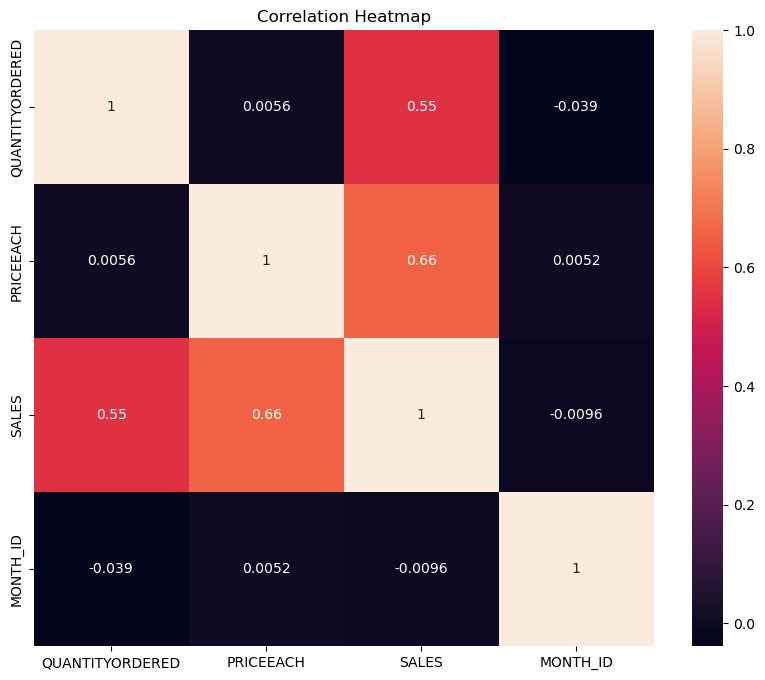

In [77]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#clear

Task 9, done.

### 10. Customer Segmentation (K-means Clustering)

##### Customer Segmentation using K-means clustering is a common technique in data analysis and machine learning to group customers into distinct segments based on their characteristics.

In [78]:
# First let's import scikit-learn library.

from sklearn.cluster import KMeans as KM
from sklearn.preprocessing import StandardScaler as SS

Then we collect the variables that are needed for this task.

In [79]:
# We aggregate the data by CUSTOMERNAME to compute the total SALES (named TOTAL_SALES) and the count of ORDERNUMBER (named ORDER_FREQUENCY). 
# 
# The resulting DataFrame is then reset to have a standard index.

customer_data = df.groupby('CUSTOMERNAME').agg({'SALES': 'sum', 'ORDERNUMBER': 'count'}).reset_index()\
                .rename(columns={'SALES': 'Total_Sales', 'ORDERNUMBER': 'Order_Frequency'})
customer_data

,CUSTOMERNAME,Total_Sales,Order_Frequency
0,"AV Stores, Co.",157807.81,51
1,Alpha Cognac,70488.44,20
2,Amica Models & Co.,94117.26,26
3,"Anna's Decorations, Ltd",153996.13,46
4,Atelier graphique,24179.96,7
...,...,...,...
87,"Vida Sport, Ltd",117713.56,31
88,Vitachrome Inc.,88041.26,25
89,"Volvo Model Replicas, Co",75754.88,19
90,West Coast Collectables Co.,46084.64,13


After selecting the specified variables and assuming the data has been cleaned, the next steps for k-means involve standardizing the data, determining the optimal number of clusters, and finally performing the clustering process.

In [80]:
# Standardize the data by scaling both variables involved.

customer_data_scaled = SS().fit_transform(customer_data[['Total_Sales', 'Order_Frequency']])
customer_data_scaled

array([[ 4.44431867e-01,  6.60315577e-01],
       [-3.51497241e-01, -3.47292784e-01],
       [-1.36117015e-01, -1.52271810e-01],
       [ 4.09687834e-01,  4.97798100e-01],
       [-7.73605958e-01, -7.69838225e-01],
       [-4.05249096e-01, -2.49782297e-01],
       [ 8.38093296e-01,  7.90329559e-01],
       [-4.51939990e-01, -5.09810261e-01],
       [-4.03035390e-01, -4.12299775e-01],
       [-1.44745416e-01, -1.19768315e-01],
       [-7.52647495e-01, -7.37334730e-01],
       [ 6.88091368e-02,  4.27491626e-02],
       [-6.75035096e-01, -5.42313757e-01],
       [-2.17658135e-01, -2.82285792e-01],
       [-9.10794518e-01, -8.99852207e-01],
       [-5.41515202e-01, -5.74817252e-01],
       [-6.64373106e-01, -6.39824243e-01],
       [-3.08195906e-01, -2.82285792e-01],
       [-3.78673786e-01, -3.14789288e-01],
       [-2.84895032e-01, -3.47292784e-01],
       [-4.67551416e-01, -4.77306766e-01],
       [-1.96532500e-01, -1.84775306e-01],
       [-2.50414427e-01, -2.17278801e-01],
       [ 3.

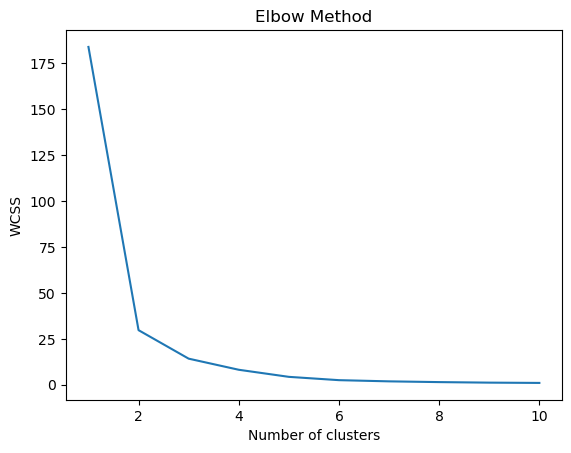

In [81]:
# Now let's generate elbow plot in order to find the optimal number of clusters.

wcss = []
for i in range(1, 11):
    kmeans = KM(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The graph revealed that 3 clusters form the final elbow point, after which the curve becomes smooth. Therefore, we select 3 clusters as our optimal choice for grouping the data.

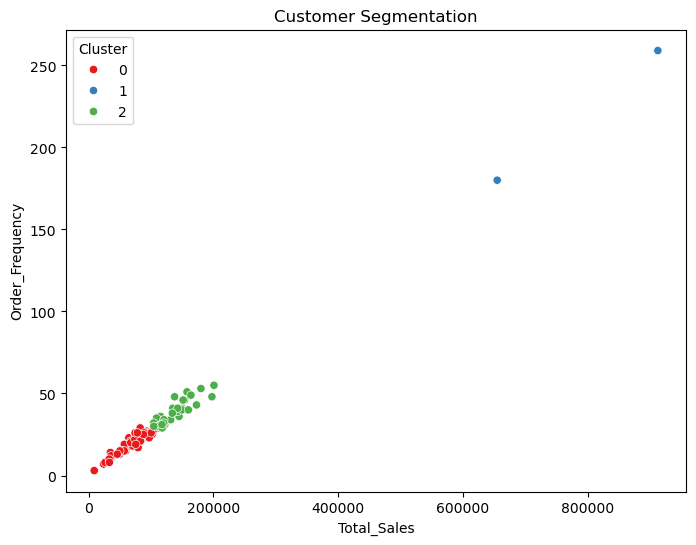

In [82]:
# KMeans clustering

kmeans = KM(n_clusters=3)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Sales', y='Order_Frequency', hue='Cluster', data=customer_data, palette='Set1')
plt.title('Customer Segmentation')
plt.show()


We can conclude that the vast majority of buyers, represented by two clusters, had total sales below 200,000 and placed around 60 orders. In contrast, the remaining 2.17% of buyers accounted for the majority of total sales and order frequency.

Task 10, done.